Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 1311 files belonging to 4 classes.
Using 262 files for validation.
['glioma', 'meningioma', 'notumor', 'pituitary']
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.6143 - loss: 0.9018 - val_accuracy: 0.7328 - val_loss: 0.6472
Epoch 2/3
143/143 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.8730 - loss: 0.3482 - val_accuracy: 0.8168 - val_loss: 0.4595
Epoch 3/3
143/143 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9184 - loss: 0.2292 - val_accuracy: 0.8893 - val_loss: 0.3415


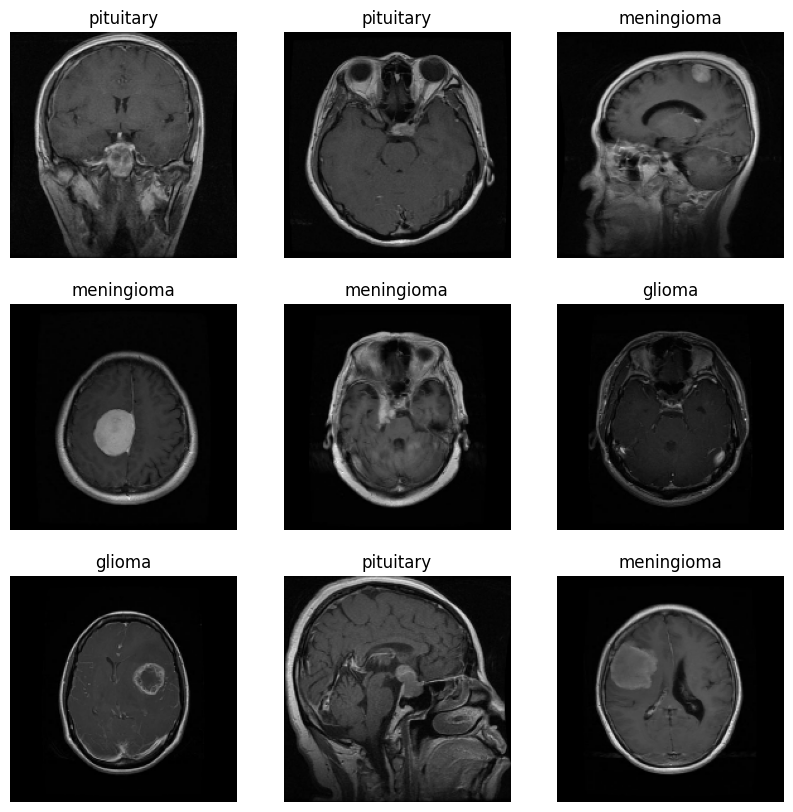

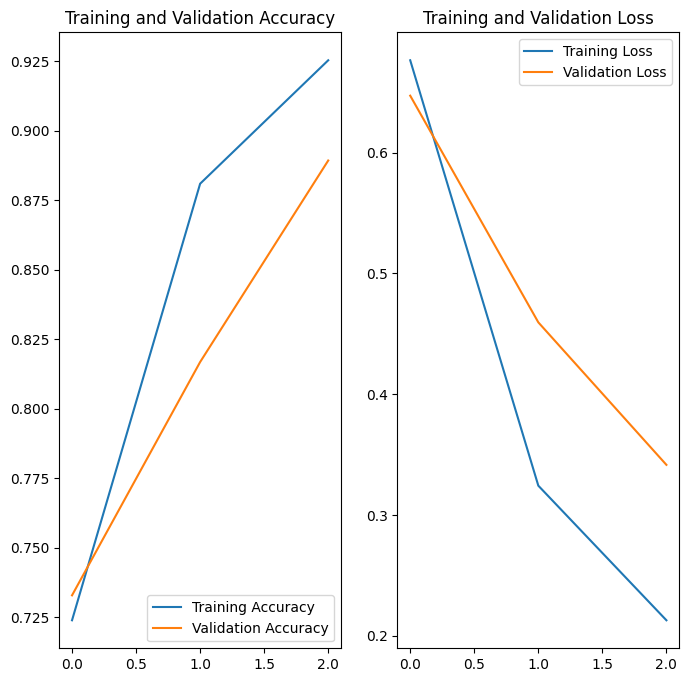

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
This image most likely belongs to glioma with a 77.06 percent confidence.


In [ ]:
# Dataset Link: https://drive.google.com/file/d/1QuXJ-uqncySBIUdJBhdPCapmoJdpInzp/view?usp=sharing

import tensorflow as tf
import zipfile
from google.colab import drive

drive.mount('/content/drive')

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/dataset.zip", 'r')
zip_ref.extractall("/content/my-dataset")
zip_ref.close()
from google.colab import drive
drive.mount('/content/drive')
batch_size = 32
img_height = 180
img_width = 180
train_data_dir = "/content/my-dataset/Training"
val_data_dir = "/content/my-dataset/Testing"
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  val_data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
epochs=3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
import numpy as np
sample_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"

img = tf.keras.utils.load_img(
    "/content/my-dataset/Testing/glioma/Te-glTr_0000.jpg", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

# New section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
